In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

Data Loading

In [4]:
data = pd.read_csv('result_text.csv')

## Summary - Conclusion of the Psychographic Analysis
The psychographic analysis conducted on the survey data reveals critical insights into how attitudes towards health, motivations for physical activity, and the potential of app features influence user engagement. The analysis uncovers distinct patterns across different segments, highlighting the importance of tailoring app features and engagement strategies to meet the diverse needs and motivations of users.

Attitude Towards Health and App Engagement: Users who place a high value on maintaining a healthy lifestyle ("Very important") are the most consistent in using health tracking apps, particularly during fitness activities. This group is strongly influenced by social community features, making them a key target for social-driven engagement strategies. In contrast, users with a neutral attitude exhibit varied app usage patterns, suggesting that personalized and motivational features may be needed to enhance their engagement.

Motivations for Participation in Physical Activities: Enjoyment and stress relief are the most common motivators, especially among those who prioritize health highly. Users who see health as "Very important" are also driven by a sense of accomplishment and the desire to set and reach personal goals. These insights suggest that health apps should focus on enhancing features that align with these motivations, such as stress relief tools, goal-setting challenges, and social interactions.

Content Preferences and Health Attitudes: Personal development and gamification elements resonate strongly with health-conscious users, while adventure and exploration activities appeal more to those with a neutral or important attitude towards health. Offering a diversified range of content can cater to different segments, ensuring broader appeal and maximizing user engagement.

School-Based Promotion and Family Challenges: Incorporating health tracking apps into school curricula and promoting family-based challenges can effectively engage users, particularly those who already value health. However, the analysis indicates that even users with lower health motivation might be influenced by structured programs like these, suggesting opportunities for broader impact.

Strategic Implications: The analysis underscores the need for personalized engagement strategies based on user attitudes and motivations. For highly motivated users, reinforcing their behavior through competitive challenges, personalized goals, and social community features can further enhance engagement. For those with neutral or lower motivation, tailored incentives, gamification, and structured programs like school-based promotion can help increase app usage and foster a more health-focused lifestyle.

In conclusion, this psychographic analysis provides a roadmap for designing and promoting health apps that effectively engage diverse user segments. By aligning app features with the specific needs and motivations of different groups, developers and marketers can create more meaningful and lasting engagement, ultimately promoting healthier lifestyles across the board.

IndexError: index 0 is out of bounds for axis 0 with size 0

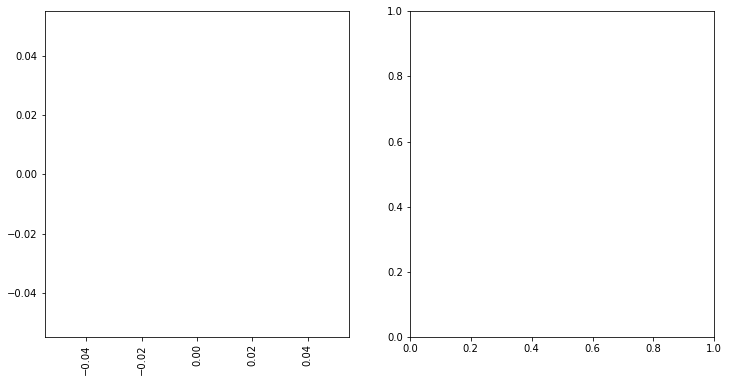

In [16]:
# Create separate dataframes for yes and no responses
yes_df = data[data['Do you currently use any form of health tracking app (eg: Strava, Nike Run Club, Apple Fitness)?'] == 'yes']
no_df = data[data['Do you currently use any form of health tracking app (eg: Strava, Nike Run Club, Apple Fitness)?'] == 'no']

# Count the occurrences of each attitude for both groups
yes_breakdown = yes_df['How would you describe your attitude towards maintaining a healthy lifestyle?'].value_counts()
no_breakdown = no_df['How would you describe your attitude towards maintaining a healthy lifestyle?'].value_counts()

# Create subplots for comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for people who use health tracking apps
yes_breakdown.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Attitude Breakdown (Health Tracking App Users)')
ax[0].set_xlabel('Attitude')
ax[0].set_ylabel('Count')

# Plot for people who do not use health tracking apps
no_breakdown.plot(kind='bar', ax=ax[1], color='lightcoral')
ax[1].set_title('Attitude Breakdown (Non-Health Tracking App Users)')
ax[1].set_xlabel('Attitude')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()



Interest-Based Segmentation and Incentive Preferences

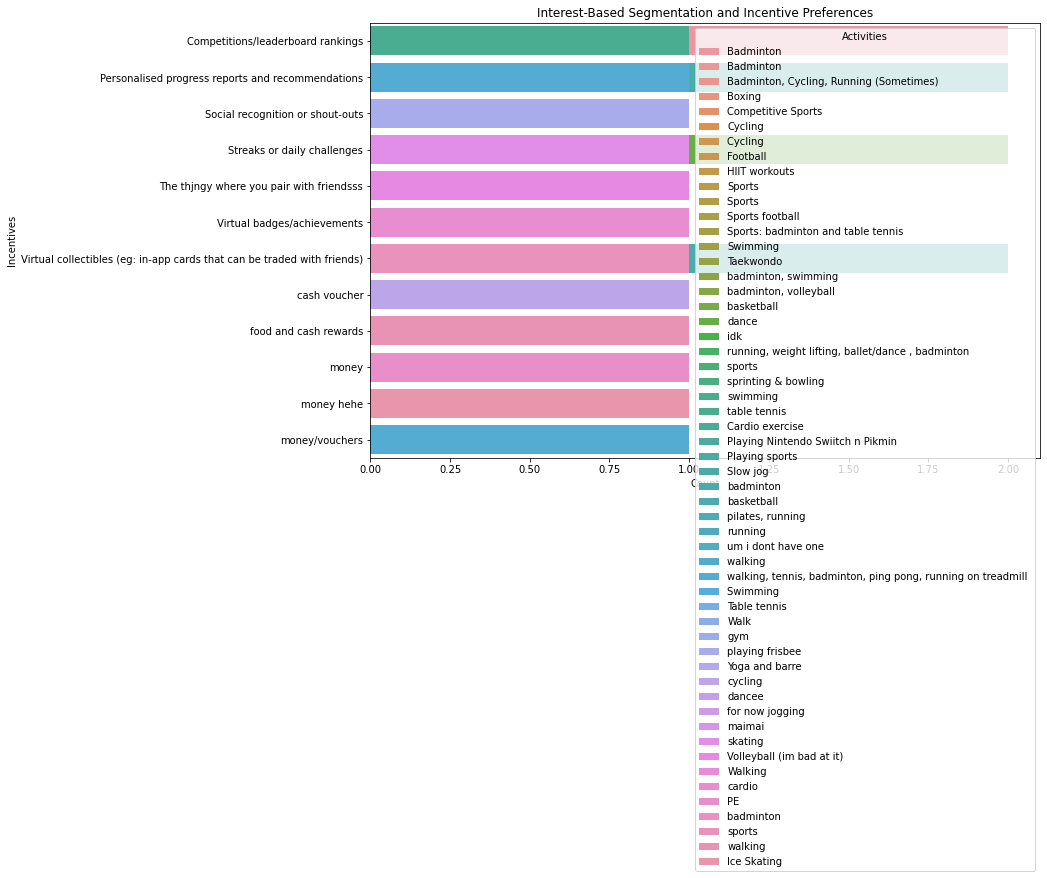

In [22]:
data['Incentives'] = data['What types of rewards or incentives would encourage you to use an app regularly?'].str.split(';')

# Split the 'What is your favourite physical activity (eg: sports, exercises, hobbies)?' into individual activities
data['Activities'] = data['What is your favourite physical activity (eg: sports, exercises, hobbies)?'].str.split(';')

# Flatten the data to create a row for each incentive and activity per respondent
flattened_data = data.explode('Incentives').explode('Activities')


aggregated_data = flattened_data.groupby(['Incentives', 'Activities']).size().reset_index(name='Count')

# Create a barplot for better readability
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Incentives', hue='Activities', data=aggregated_data, dodge=False)
plt.title('Interest-Based Segmentation and Incentive Preferences')
plt.xlabel('Count')
plt.ylabel('Incentives')
plt.show()


##### - Diverse Preferences: The chart shows a variety of activities associated with different incentives. This indicates that the respondents' interests are diverse, and there isn't a one-size-fits-all incentive for all activities.

##### - Monetary Incentives: "Money" and "cash vouchers" seem to be common incentives across various activities, suggesting that financial rewards are generally appealing to many users, regardless of their preferred physical activity.

##### - Non-Monetary Incentives: Other incentives like "competitions/leaderboard rankings," "virtual badges/achievements," and "social recognition or shout-outs" are also prevalent. These are more intrinsic motivators that may appeal to users who are driven by competition, social standing, or personal achievement.

##### - Activity-Specific Incentives: Certain activities like "badminton," "cycling," and "football" appear across multiple incentives, indicating that these activities might have broader appeal or that respondents engaged in these activities are more diverse in their reward preferences.

##### - Strategic Considerations: Targeted Incentives: Depending on the most popular activities, the app could offer customized incentives to boost engagement. For instance, offering "competitions/leaderboard rankings" for competitive sports like football and "virtual badges" for more solo activities like running or swimming.

##### - Monetary vs. Non-Monetary Balance: While monetary incentives are universally appealing, integrating non-monetary incentives that align with users' intrinsic motivations (like achievements or social recognition) could lead to long-term engagement.

##### - Activity-Specific Campaigns: Creating campaigns or challenges focused on popular activities (like badminton or cycling) with tailored incentives could enhance user participation and retention.

 Attitude Towards Health and App Usage Frequency

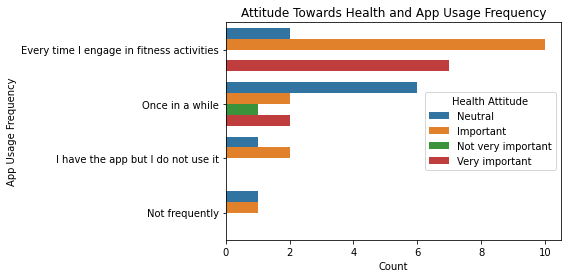

In [7]:

sns.countplot(y='How often do you use health tracking apps to track your physical activities/habits?',
              hue='How would you describe your attitude towards maintaining a healthy lifestyle?',
              data=data)
plt.title('Attitude Towards Health and App Usage Frequency')
plt.xlabel('Count')
plt.ylabel('App Usage Frequency')
plt.legend(title='Health Attitude')
plt.show()

import plotly.express as px
import pandas as pd

data_filtered = data.copy()
total_counts = data_filtered.groupby('How would you describe your attitude towards maintaining a healthy lifestyle?')['How often do you use health tracking apps to track your physical activities/habits?'].count().reset_index(name='Total')

# Merge data to calculate percentages
merged_data = pd.merge(data_filtered, total_counts, on='How would you describe your attitude towards maintaining a healthy lifestyle?')
merged_data['Percentage'] = merged_data.groupby(['How would you describe your attitude towards maintaining a healthy lifestyle?'])['How often do you use health tracking apps to track your physical activities/habits?'].transform('count') / merged_data['Total'] * 100

# Create the plot
fig = px.bar(merged_data, 
             x='Percentage', 
             y='How often do you use health tracking apps to track your physical activities/habits?', 
             color='How would you describe your attitude towards maintaining a healthy lifestyle?', 
             orientation='h',
             labels={'How often do you use health tracking apps to track your physical activities/habits?': 'App Usage Frequency',
                     'How would you describe your attitude towards maintaining a healthy lifestyle?': 'Health Attitude'},
             hover_data=['Percentage'],
             title='Attitude Towards Health and App Usage Frequency (Percentage)')

fig.update_layout(barmode='group', xaxis_title='Percentage', yaxis_title='App Usage Frequency')
fig.show()



### Key Insights:
##### - Strong Correlation Between High Health Attitude and Frequent App Usage: Respondents who consider maintaining a healthy lifestyle as "Very important" (red bars) predominantly use health tracking apps "Every time I engage in fitness activities." This indicates a strong correlation between valuing health and consistent app usage.
##### -Lower Engagement Among Neutral Attitudes: Those with a "Neutral" attitude towards health (blue bars) are spread across different app usage frequencies, with some using the app "Once in a while" and others "Not frequently." This suggests that neutral attitudes towards health might lead to inconsistent app engagement.

##### - Significant Drop-Off in Usage: As the importance of maintaining a healthy lifestyle decreases (e.g., "Important" and "Not very important"), there's a noticeable drop-off in frequent app usage. Most respondents with these attitudes tend to use the app less consistently, either "Once in a while" or "Not frequently."
##### - Strategic Considerations: Target Highly Motivated Users: Since users who value health highly are more likely to use the app consistently, features that reinforce and reward their behavior could further enhance engagement.
##### - Intervention Strategies for Neutral Attitudes: Respondents with a neutral attitude towards health might benefit from features or incentives designed to boost their motivation, such as reminders, social sharing, or personalized recommendations.
##### - Focus on Retention: Users who find health "Important" but not "Very important" might need additional nudges to maintain regular app usage. Offering incentives or challenges tied to their health goals could help increase their engagement.

Influence of Social Community on Health Attitudes

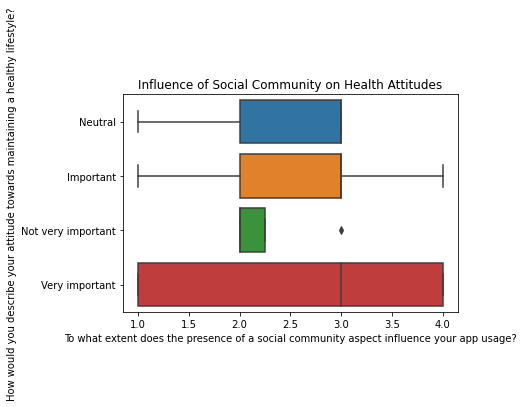

In [10]:
sns.boxplot(x='To what extent does the presence of a social community aspect influence your app usage?',
            y='How would you describe your attitude towards maintaining a healthy lifestyle?',
            data=data)
plt.title('Influence of Social Community on Health Attitudes')
plt.show()


### Key Insights:
##### - Higher Influence for Health-Conscious Users: Respondents who consider maintaining a healthy lifestyle as "Very important" are clustered towards the higher end of the x-axis. This suggests that those who place a high value on health are also more likely to be influenced by social community aspects in their app usage.
##### -  Moderate Influence for Others: Those who consider health as "Important" or "Neutral" tend to have a moderate level of social community influence on their app usage. Their boxes are more spread out, indicating a wider range of responses, but they generally lean towards moderate influence.
##### - Lower Influence for Less Health-Conscious Users: Respondents who consider maintaining a healthy lifestyle as "Not very important" appear to have a lower social community influence on their app usage. This group has a small box, indicating less variability and generally lower influence.
##### - Strategic Implications: Focus on Social Features for Health-Conscious Users: Since users who consider health "Very important" are more influenced by social community aspects, app developers should enhance social features (e.g., friend activity sharing, group challenges) to maintain their engagement.

##### - Tailored Strategies for Moderate Users: Users who have an "Important" or "Neutral" attitude towards health might benefit from customized incentives that enhance the influence of social communities. For example, implementing peer support features or integrating social rewards might increase their engagement.

##### -  Alternative Engagement Strategies for Low-Influence Users: For users who are less influenced by social aspects, alternative strategies like personalized recommendations or gamification features (e.g., streaks and badges) might be more effective in driving app usage.

Correlating Gamification Features with Health Attitudes

In [26]:
data['How would you describe your attitude towards maintaining a healthy lifestyle?']

0                Neutral
1              Important
2                Neutral
3     Not very important
4         Very important
             ...        
60             Important
61               Neutral
62             Important
63             Important
64        Very important
Name: How would you describe your attitude towards maintaining a healthy lifestyle?, Length: 65, dtype: object

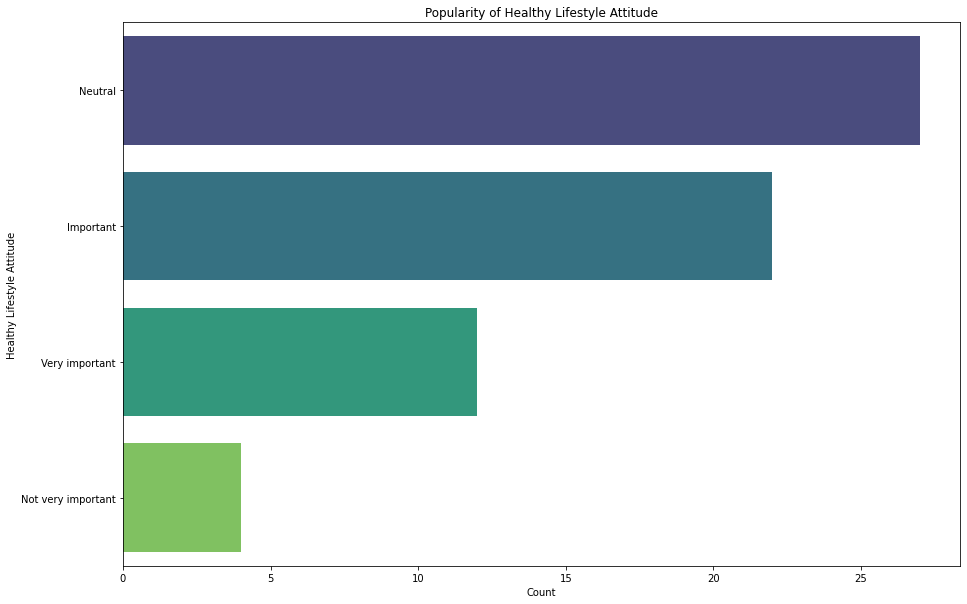

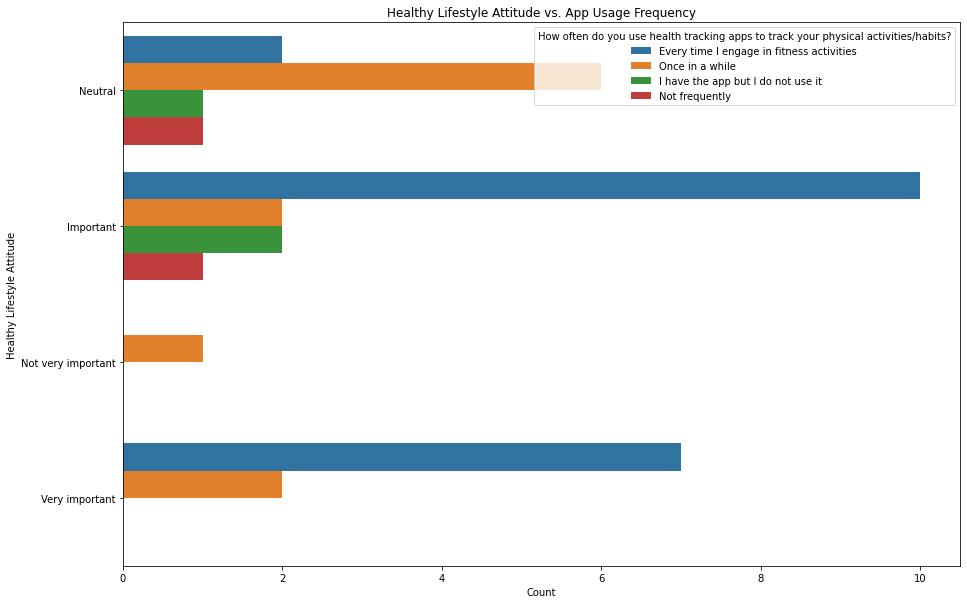

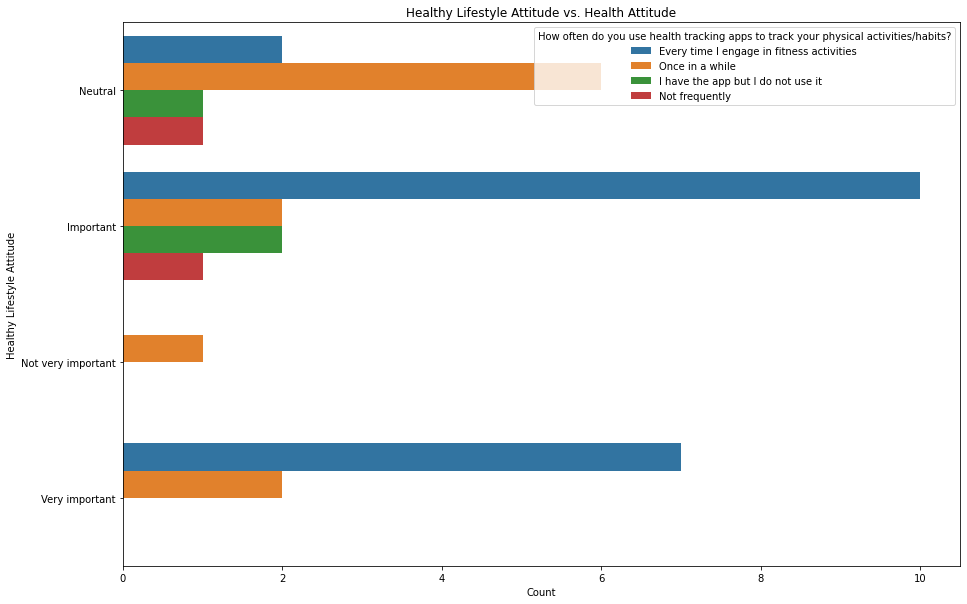

In [29]:
# Step 1: Data Preprocessing

# Assume 'data' is your DataFrame
# Split the 'How would you describe your attitude towards maintaining a healthy lifestyle?' column into individual features
data['Healthy Lifestyle Attitude'] = data['How would you describe your attitude towards maintaining a healthy lifestyle?'].str.split(';')

# Flatten the data to create a row for each gamification feature per respondent
flattened_data = data.explode('Healthy Lifestyle Attitude' )

# Step 2: Correlation Analysis

# Count the occurrence of each gamification feature
feature_counts = flattened_data['Healthy Lifestyle Attitude'] .value_counts()

# Popularity of Gamification Features
plt.figure(figsize=(15, 10))
sns.barplot(x=feature_counts.values, y=feature_counts.index, palette='viridis')
plt.title('Popularity of Healthy Lifestyle Attitude')
plt.xlabel('Count')
plt.ylabel('Healthy Lifestyle Attitude')
plt.show()


# Gamification Features vs. App Usage Frequency
plt.figure(figsize=(15, 10))
sns.countplot(y='Healthy Lifestyle Attitude', 
              hue='How often do you use health tracking apps to track your physical activities/habits?',
              data=flattened_data)
plt.title('Healthy Lifestyle Attitude vs. App Usage Frequency')
plt.xlabel('Count')
plt.ylabel('Healthy Lifestyle Attitude')
plt.show()


# Gamification Features vs. Health Attitude
plt.figure(figsize=(15, 10))
sns.countplot(y='Healthy Lifestyle Attitude', 
              hue='How often do you use health tracking apps to track your physical activities/habits?',
              data=flattened_data)
plt.title('Healthy Lifestyle Attitude vs. Health Attitude')
plt.xlabel('Count')
plt.ylabel('Healthy Lifestyle Attitude')
plt.show()

### Chart 1: Popularity of Healthy Lifestyle Attitude
##### -  Neutral: The most common response, with the highest count. A significant portion of respondents has a neutral attitude towards maintaining a healthy lifestyle.
##### -  Important: A considerable number of respondents find maintaining a healthy lifestyle important, but not the majority.
##### - Very Important: Some respondents place a high priority on a healthy lifestyle, but they are fewer compared to the other categories.
##### - Not Very Important: The least common attitude, indicating that only a small number of respondents don't prioritize a healthy lifestyle.
### Chart 2: Healthy Lifestyle Attitude vs. App Usage Frequency
##### - Neutral: Respondents with a neutral attitude towards a healthy lifestyle tend to use health tracking apps most frequently when engaging in fitness activities. They have varied usage patterns, including “once in a while” and less frequent usage.
##### - Important: Those who find a healthy lifestyle important tend to use health tracking apps frequently during fitness activities, with some using them once in a while or not frequently.
##### - Very Important: Respondents who value a healthy lifestyle highly are the most consistent users of health tracking apps every time they engage in fitness activities.
##### - Not Very Important: This group shows minimal engagement with health tracking apps, with some using them infrequently.
### Chart 3: Healthy Lifestyle Attitude vs. Health Attitude
##### - This chart essentially mirrors the previous one but focuses on attitudes towards health in relation to app usage.
##### - Neutral: Respondents with a neutral attitude towards health are spread across different app usage frequencies.
##### - Important: Respondents who find health important mostly engage with apps frequently during fitness activities.
##### - Very Important: This group is the most consistent in using apps every time they engage in fitness activities, showing a strong correlation between valuing health and frequent app usage.
##### - Not Very Important: These respondents engage the least with health apps, indicating a lack of motivation or interest in tracking their health.

### Neutral and Important Groups: A large portion of users falls into these categories, which indicates a moderate but not overwhelming engagement with healthy lifestyles and app usage.
### High Correlation in Very Important Group: Users who place a high importance on a healthy lifestyle are consistently using health apps, making them a key target group for features and promotions that reinforce this behavior.
### Low Engagement in Not Very Important Group: There's an opportunity to explore what might incentivize this group to increase their app usage or to engage with health more positively.

 Personalized Features and Attitude Towards Health

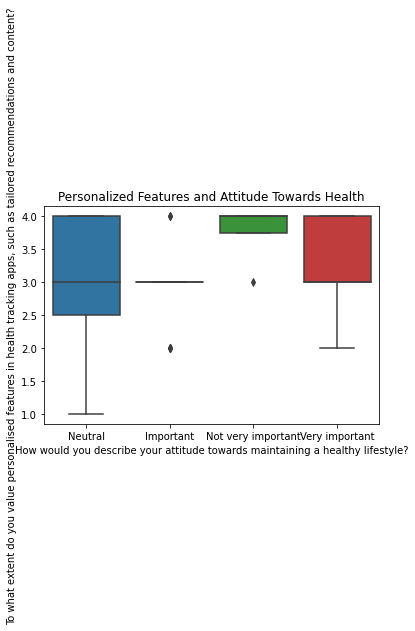

In [12]:
sns.boxplot(x='How would you describe your attitude towards maintaining a healthy lifestyle?',
            y='To what extent do you value personalised features in health tracking apps, such as tailored recommendations and content?',
            data=data)
plt.title('Personalized Features and Attitude Towards Health')
plt.show()


### Key Insights:

##### -  Personalization as a Universal Appeal: Across different health attitudes, there is a consistent appreciation for personalized features, particularly among those who are more health-conscious. This suggests that health apps should emphasize personalized content to cater to a broad audience.
##### -  Tailored Engagement: For users with a neutral or less strong attitude towards health, personalized features could serve as an important tool to enhance engagement and motivation, potentially nudging them towards a more health-focused lifestyle.

Family-Based Challenges and Health Attitudes

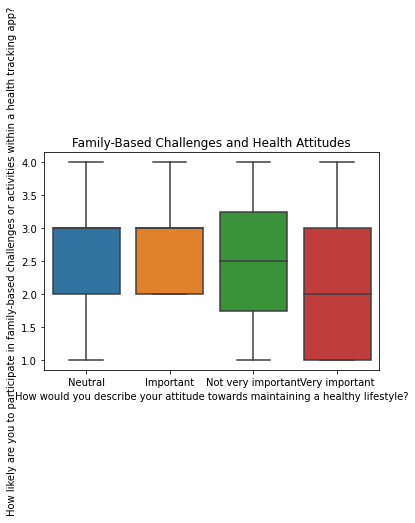

In [13]:
sns.boxplot(x='How would you describe your attitude towards maintaining a healthy lifestyle?',
            y='How likely are you to participate in family-based challenges or activities within a health tracking app?',
            data=data)
plt.title('Family-Based Challenges and Health Attitudes')
plt.show()


### Key Insights:
##### - Neutral Attitude: Respondents with a neutral attitude towards maintaining a healthy lifestyle show a relatively moderate likelihood to participate in family-based challenges. The range of likelihood is somewhat broad, indicating mixed interest among this group.

##### - Important Attitude: Those who consider maintaining a healthy lifestyle as important tend to show a consistent and moderate interest in participating in family-based challenges. The distribution is fairly centered, suggesting that this group could be more reliably engaged with such challenges.

##### - Not Very Important Attitude: This group shows the widest range of responses, with some individuals being very likely to participate and others showing minimal interest. This variation suggests that factors beyond their general health attitude may influence their decision to participate in family-based challenges.

##### -  Very Important Attitude: Interestingly, the group that places the highest importance on maintaining a healthy lifestyle shows a relatively lower median likelihood of participating in family-based challenges. This could indicate that while they value health highly, they may prefer other forms of engagement or challenges.

##### - Targeted Engagement: For users with a neutral or moderate attitude towards health, family-based challenges could be an effective way to increase their engagement with the app. However, for those who are very health-conscious, alternative forms of challenges or features that align with their strong health motivations might be more appropriate.
##### -  Diverse Strategies: Given the variation in responses, particularly among those with lower health motivation, offering a variety of challenge types (e.g., solo, community-based, family-oriented) could cater to different preferences and increase overall participation.

Content Preferences Based on Health Attitudes

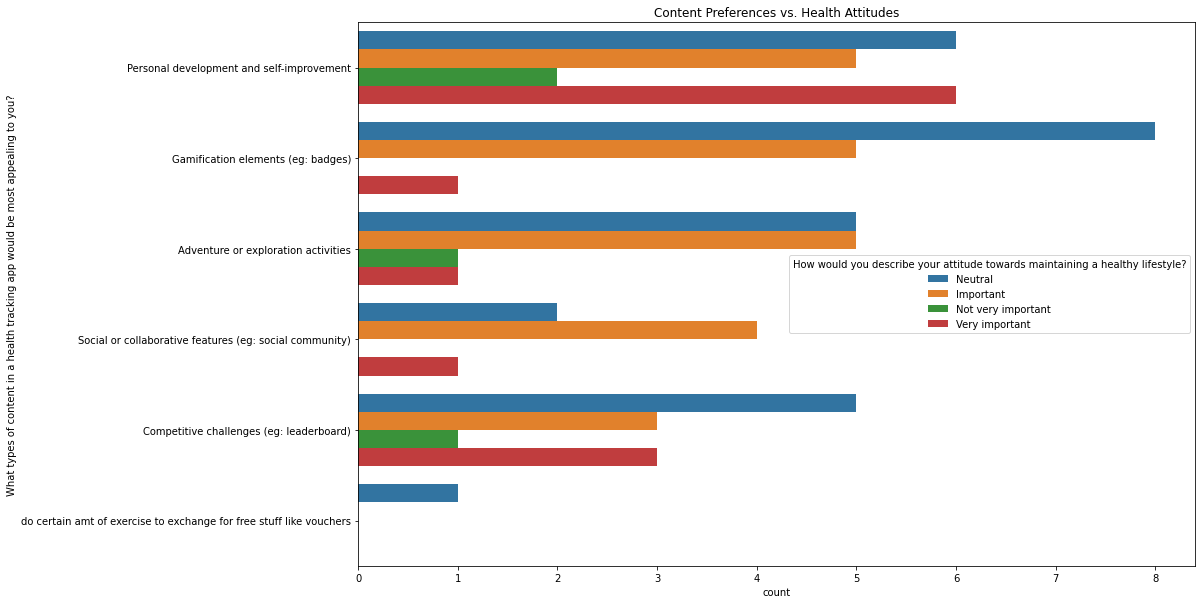

In [27]:
plt.figure(figsize=(15, 10))
sns.countplot(y='What types of content in a health tracking app would be most appealing to you?',
              hue='How would you describe your attitude towards maintaining a healthy lifestyle?',
              data=data)
plt.title('Content Preferences vs. Health Attitudes')
plt.show()


### Key Insights:
##### - Personal Development and Self-Improvement: Respondents who consider health to be "Very important" find personal development content highly appealing. Those with a "Neutral" attitude also show interest, but to a lesser extent.


##### - Gamification features are particularly appealing to those who view maintaining a healthy lifestyle as "Important." Interest is also observed among those with a "Very important" attitude, but "Neutral" respondents show moderate interest.
##### -  Adventure or Exploration Activities. This content type appeals most to those with a "Neutral" or "Important" attitude towards health. Interestingly, respondents who consider health to be "Very important" show less interest in this category.
##### -  Social or Collaborative Features: Respondents with an "Important" attitude towards health are more likely to be interested in social or collaborative features. The "Very important" group shows less interest in social features compared to other categories.
##### - Competitive Challenges (eg: leaderboard): Those with a "Very important" attitude towards health are highly interested in competitive challenges, which suggests that competition may be a strong motivator for them. The "Important" group also shows interest, but less so than the "Very important" group.
##### - Exchange Exercise for Vouchers: This type of content is most appealing to respondents with a "Neutral" attitude towards health. The other groups show very limited interest in this incentive.


##### -  Personalization: Tailoring app content to match the health attitudes of users could significantly increase engagement. For example, emphasizing personal development features for health-conscious users and gamification for those who find health important.
##### -  Diversified Content: Offering a range of content types that cater to various health attitudes ensures broader appeal and maximizes user engagement.
##### - Motivation through Competition: Leveraging competitive challenges could effectively engage users who are highly motivated by health, while social features could appeal to those with a more moderate view of health importance.

Motivations for Participation in Physical Activities

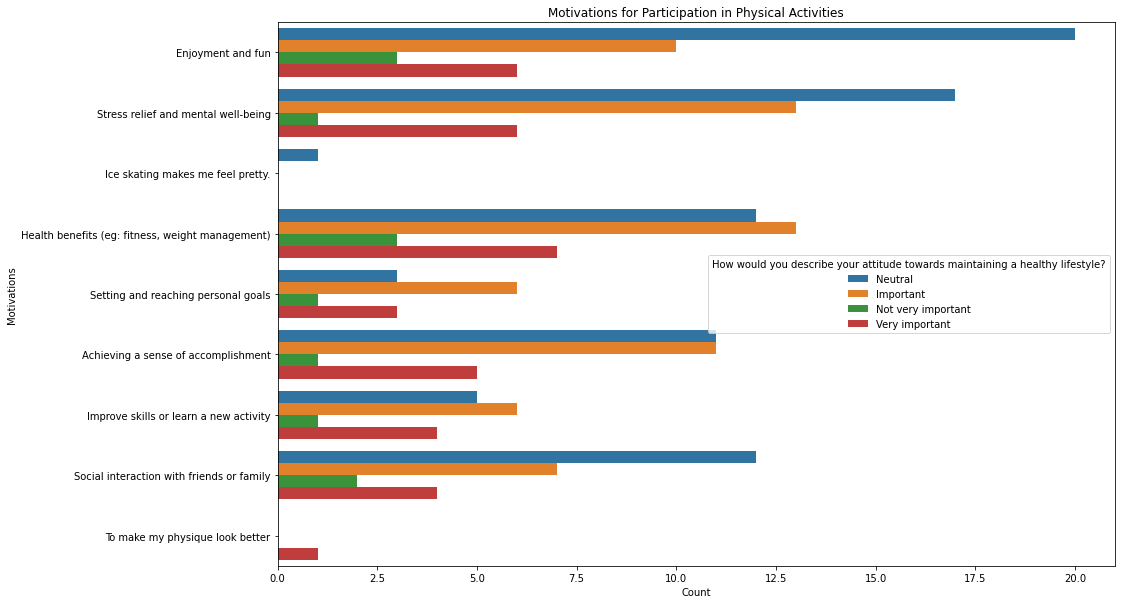

In [28]:
# Step 1: Data Preprocessing

# Split the 'What are the top 3 motivations for your participation in physical activities?' column into individual motivations
data['Motivations'] = data['What are the top 3 motivations for your participation in physical activities?'].str.split(';')

# Flatten the data to create a row for each motivation per respondent
flattened_motivation_data = data.explode('Motivations')

# Step 2: Visualization

# Create a countplot to visualize the relationship between motivations and health attitudes
plt.figure(figsize=(15, 10))
sns.countplot(y='Motivations', 
              hue='How would you describe your attitude towards maintaining a healthy lifestyle?',
              data=flattened_motivation_data)
plt.title('Motivations for Participation in Physical Activities')
plt.xlabel('Count')
plt.ylabel('Motivations')
plt.show()


### Key Insights:
##### - Enjoyment and Fun: This is the most common motivation across all health attitudes, but especially prevalent among those who describe their attitude towards maintaining a healthy lifestyle as "Neutral." Stress Relief and Mental Well-being: This motivation is particularly important for those who consider maintaining a healthy lifestyle as "Very important." It is also significant for those with an "Important" attitude but less so for those with a "Neutral" stance.

##### - Health Benefits: As expected, health benefits like fitness and weight management are a major motivator, especially for those who find health "Very important." Interestingly, even those with a "Neutral" attitude find health benefits motivating, though to a lesser extent.

##### - Social Interaction with Friends or Family: Social interaction is a notable motivator, particularly for those who view health as "Important." The "Very important" group shows slightly less interest in this motivator compared to others.

##### - Achieving a Sense of Accomplishment: This motivation is especially significant for those who see maintaining a healthy lifestyle as "Very important." The "Neutral" and "Important" groups also value this, but it is a stronger driver for the "Very important" group.

##### - Improving Skills or Learning a New Activity: This motivator appeals most to those with a "Very important" or "Important" attitude towards health. Those with a "Neutral" stance are less motivated by the desire to improve skills or learn something new.

##### - Setting and Reaching Personal Goals: This is another motivation that resonates well with those who consider health to be "Very important." The "Important" group also values this, but it’s less of a priority for the "Neutral" group.

##### - Strategic Implications: Personalization: Understanding these motivations can help in designing more tailored and engaging experiences within health apps. For example, stress relief features could be highlighted for those who prioritize health, while fun and social aspects could appeal to a broader audience.

##### - Targeted Messaging: Health apps can segment users based on their primary motivations and health attitudes, offering personalized content and challenges that align with their specific drivers.

##### -  Feature Prioritization: App developers can prioritize features that cater to the most common motivations across different health attitudes, such as incorporating more gamification elements for enjoyment or offering challenges that promote stress relief.

School-Based Promotion and Health Attitudes

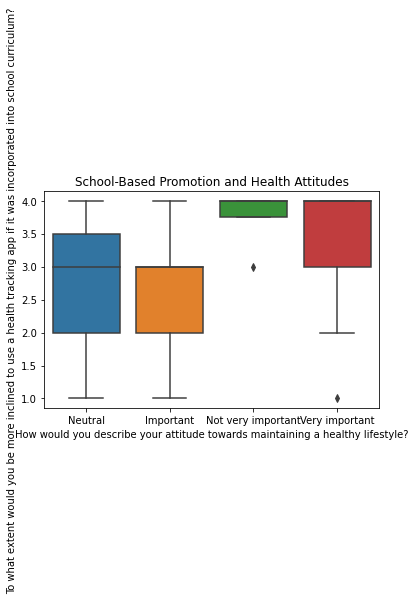

In [16]:
sns.boxplot(x='How would you describe your attitude towards maintaining a healthy lifestyle?',
            y='To what extent would you be more inclined to use a health tracking app if it was incorporated into school curriculum?',
            data=data)
plt.title('School-Based Promotion and Health Attitudes')
plt.show()


### Key Insights:
##### - Very Important Attitude: Respondents who consider maintaining a healthy lifestyle as "Very important" are generally more inclined to use a health tracking app if it was incorporated into the school curriculum. The median value is higher for this group, indicating strong interest.

##### - Neutral Attitude: Those with a "Neutral" attitude have a wider spread of responses, indicating more variability in their inclination to use the app within a school curriculum. However, the median value is relatively lower compared to the "Very important" group.

##### - Important Attitude:Respondents who find health "Important" show a lower median value compared to those who view it as "Very important," but there's still a significant level of interest.

##### - Not Very Important Attitude: This group has a small representation but shows a high median value, indicating that even those who do not prioritize health highly could be influenced by school-based promotion to use a health app.

##### - Targeted School Programs: Schools can be effective venues for promoting health apps, especially among students who already value health highly. Tailoring health tracking apps to fit within the school curriculum could enhance engagement, particularly among students with a positive health attitude.
##### - Engagement Strategies for Neutral Attitudes: For students with a neutral attitude towards health, schools could consider incorporating elements that appeal to this group, such as gamification or social challenges, to increase their inclination to use the app.
##### - Opportunities for Broader Impact: Even students who do not place high importance on health might be encouraged to use a health app if it is embedded within their school activities, suggesting that school-based promotions can have a broad-reaching impact.